# Evaluation: Precision & Recall

Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics.

We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 

In [1]:
# Libraries
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import matplotlib.gridspec as gridspec
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
# Load data
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

#### Now take a look at the shapes of the X and y matrices.

In [3]:
# your code here
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

Feature matrix shape: (70000, 784)
Target vector shape: (70000,)


#### Let's pick one entry and see what number is written. Use indexing to pick the 35th digit.

In [4]:
# your code here
idx = 35
num35 = X[idx,:]

####  Use the *reshape(28,28)* method and *plt.imshow()* function with the parameters *cmap = matplotlib.cm.binary* and *interpolation="nearest"* to make a plot of the number. Be sure to import matplotlib.

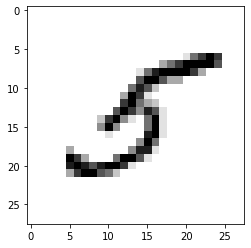

In [5]:
# your code here
mat35 = num35.reshape(28,28)
plt.figure(figsize=(8,4))
plt.imshow(mat35,cmap = cm.binary,interpolation='nearest')

#### Use indexing to see if what the plot shows matches with the outcome of the 35th index.

In [6]:
# your code here
print(y[idx])

5


#### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training and the rest for testing.

In [7]:
# your code here
X_train = X[0:60000]
X_test  = X[60000:]
y_train = y[0:60000]
y_test  = y[60000:]

#### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5.

In [8]:
# your code here
# make a new array with one and zeros (5 or not 5)
idx = y_train == '5'
y_train_5 = idx.astype(int)
idx = y_test == '5'
y_test_5 = idx.astype(int)

#### Lets train a logistic regression to predict if a number is a 5 or not. Remember to use the 'just 5s' target train array.

In [9]:
# your code here
# data is already scaled to be used
clf = LogisticRegression(solver='lbfgs',multi_class='ovr')
model = clf.fit(X_train,y_train_5)

C:\Users\beto\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Does the classifier predict correctly the 35th digit we picked before?

In [10]:
# your code here
if model.predict(X_train)[35]:
    print('The classifier predicted correctly the 35th digit.')
else:
    print("The classifier didn't predict correctly the 35th digit.")

The classifier predicted correctly the 35th digit.


#### The 36000th value is a 9. Check if it was correctly predicted.

In [11]:
# your code here
if model.predict(X_train)[36000]:
    print("The classifier didn't predict correctly the 36000th digit.")
else:
    print("The classifier predicted correctly the 36000th digit.")

The classifier predicted correctly the 36000th digit.


#### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below.

In [12]:
# Libraries
from sklearn.base import BaseEstimator

In [13]:
# Dumb classifier
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1))[:, 0]

never_5_clf = Never5Classifier()

#### Now lets fit and predict on the testing set using our dumb classifier.

In [14]:
# your code here
never_5_clf.fit(X_train,y_train_5)
y_pred_dummy = never_5_clf.predict(X_test)

#### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

Confusion matrix coefficients: $C_{00}$: TN, $C_{01}$: FP, $C_{10}$: FN and $C_{11}$: TP.

In [15]:
# your code here
y_pred_5 = model.predict(X_test)
log_reg_c_mat = confusion_matrix(y_test_5, y_pred_5)
prd_dum_c_mat = confusion_matrix(y_test_5, y_pred_dummy)
print(f"Confusion matrix logistic regression model:\n{log_reg_c_mat}")
print(f"Confusion matrix dummy model:\n{prd_dum_c_mat}")
TN = log_reg_c_mat[0,0]
FP = log_reg_c_mat[0,1]
FN = log_reg_c_mat[1,0]
TP = log_reg_c_mat[1,1]
log_reg_prec = TP/(TP+FP)
log_reg_fpr = FP/(TN+FP)
log_reg_rec  = TP/(TP+FN)
TNd = prd_dum_c_mat[0,0]
FPd = prd_dum_c_mat[0,1]
FNd = prd_dum_c_mat[1,0]
TPd = prd_dum_c_mat[1,1]
prd_dum_fpr = FPd/(TNd+FPd)
prd_dum_rec  = TPd/(TPd+FNd)
f1_log_reg = f1_score(y_test_5, y_pred_5)
f1_prd_dum = f1_score(y_test_5, y_pred_dummy)
print(f"Precision logistic regression model: {round(log_reg_prec*100,2)} %")
print(f"FPR logistic regression model: {round(log_reg_fpr*100,2)} %")
print(f"FPR dummy model: {round(prd_dum_fpr*100,2)} %")
print(f"Recall logistic regression model: {round(log_reg_rec*100,2)} %")
print(f"Recall dummy model: {round(prd_dum_rec*100,2)} %")
print(f"F1_score logistic regression model: {round(f1_log_reg*100,2)} %")
print(f"F1_score dummy model: {round(f1_prd_dum*100,2)} %")
print(f"The probability used for cutoff is 50 % (default) as the example below:")
y_pred_5_prob = model.predict_proba(X_test)
np.set_printoptions(suppress=True)
print(f"{(y_pred_5_prob[84:99]*100).round(2)} and {y_pred_5[84:99]}")

Confusion matrix logistic regression model:
[[9034   74]
 [ 147  745]]
Confusion matrix dummy model:
[[9108    0]
 [ 892    0]]
Precision logistic regression model: 90.96 %
FPR logistic regression model: 0.81 %
FPR dummy model: 0.0 %
Recall logistic regression model: 83.52 %
Recall dummy model: 0.0 %
F1_score logistic regression model: 87.08 %
F1_score dummy model: 0.0 %
The probability used for cutoff is 50 % (default) as the example below:
[[ 64.52  35.48]
 [ 99.99   0.01]
 [100.     0.  ]
 [ 87.47  12.53]
 [100.     0.  ]
 [ 99.88   0.12]
 [ 97.93   2.07]
 [ 99.96   0.04]
 [ 98.75   1.25]
 [ 99.16   0.84]
 [ 99.59   0.41]
 [100.     0.  ]
 [ 93.52   6.48]
 [ 99.99   0.01]
 [ 47.34  52.66]] and [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


#### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

Where are looking at models that maximizes $F_1$ scores, thus even models with 100 % precision could be useless. There is a compromise between precision and recall, and this is expressed by the $F_1$ scores.

#### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each.

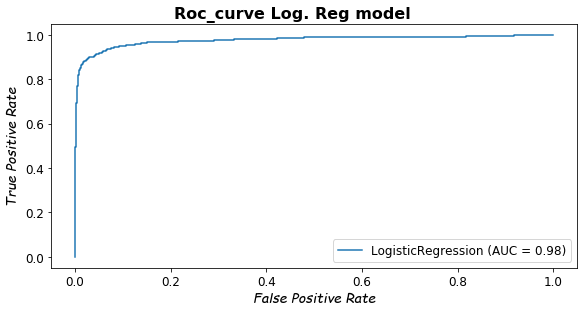

In [16]:
# your code here

fig = plt.figure(figsize=[8,4],constrained_layout=True)
fig.suptitle('Roc_curve Log. Reg model', size=16, weight='bold',y=1.05)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)
ax1 = fig.add_subplot(spec[0, 0])

plot_roc_curve(clf, X_test, y_test_5,ax=ax1)

plt.sca(ax1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
label_prop = {'size':14,'family':'fantasy','style':'oblique'}
plt.xlabel('False Positive Rate',fontdict=label_prop)
plt.ylabel('True Positive Rate',fontdict=label_prop)
ax1.legend(fontsize=12)


In [17]:
# can't use the dummie function for roc_curve plotting, could try to assign a np zeros array

# plot_roc_curve(Never5Classifier(), X_test, y_test_5,ax=ax2,color='tomato')

# plt.sca(ax1)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# label_prop = {'size':14,'family':'fantasy','style':'oblique'}
# plt.xlabel('False Positive Rate',fontdict=label_prop)
# plt.ylabel('True Positive Rate',fontdict=label_prop)
# ax1.legend(fontsize=12)

#### Now find the roc_auc_score for each. 

$AUC = 0.98$ for the logistic regression model as shown above.

#### What does this metric tell you? Which classifier works better with this metric in mind?

The roc_curve and AUC indicators confirms the logistic regression has outstanding performance in this example and the dummie model is useless.